[(605, 1324, 1067, 861)]


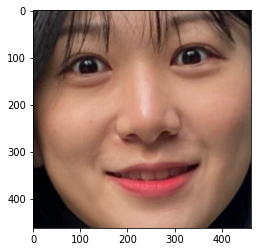

In [62]:
#얼굴 탐지

import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

image_path = os.getenv('HOME')+'/aiffel/face_embedding/project/selfie.JPG'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

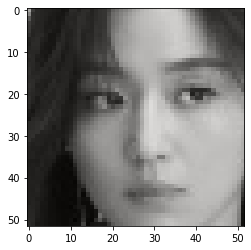

In [63]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/project/jihyeon.jpg'

import face_recognition
import os

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image [a:c, d:b, :]
    
    return cropped_face

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

In [64]:
#이미지 파일 확인

import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/project'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['selfie.JPG', 'jihyeon.jpg', 'minsi.jpg', 'yoonhee.jpg', 'ahseong.jpg', 'crystal.jpg', 'soojin.jpg', 'somin.jpg']


In [65]:
image_file = os.path.join(dir_path, 'selfie.JPG')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.09069106,  0.04761351, -0.00381573, -0.06627166, -0.11235166,
        -0.06060619, -0.07143113, -0.10218955,  0.12368759, -0.10011939,
         0.19124079, -0.11126822, -0.20498499, -0.10222041, -0.0545078 ,
         0.22751468, -0.15848109, -0.18253192, -0.03864003,  0.00449785,
         0.07631083,  0.01872169,  0.00320476,  0.10068313, -0.11388838,
        -0.30279931, -0.08841273, -0.01615337, -0.00886882, -0.06913638,
        -0.05852071,  0.06126318, -0.2190191 , -0.07374534,  0.11228996,
         0.17792545,  0.00985282, -0.10121222,  0.14930864, -0.01855101,
        -0.26283732,  0.0223022 ,  0.09671461,  0.24789134,  0.16984019,
         0.0068742 , -0.01899441, -0.16372226,  0.13368443, -0.17028554,
         0.03172306,  0.17210189,  0.05681421,  0.02350578, -0.01320511,
        -0.09536421,  0.06030767,  0.20314559, -0.15163535, -0.02946019,
         0.10344528, -0.05909864, -0.04673376, -0.1443446 ,  0.16440378,
         0.06639337, -0.11953993, -0.2605553 ,  0.1

In [66]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/project'
file_list = os.listdir(dir_path)

embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['jihyeon']

array([-0.0795783 ,  0.03469892,  0.08335693, -0.11410005, -0.08368325,
        0.03532068, -0.07668945, -0.12458202,  0.12119872, -0.18450955,
        0.22172935, -0.0792594 , -0.18930764, -0.03735346, -0.04408798,
        0.24654815, -0.14995752, -0.22702411, -0.05499256,  0.02549497,
        0.04926013,  0.0223417 , -0.0268316 ,  0.04371816, -0.16697669,
       -0.32154721, -0.09694725,  0.01304037, -0.03997554, -0.01633994,
       -0.06549414,  0.08930146, -0.19436012,  0.02700716,  0.05607829,
        0.16795513,  0.0313134 , -0.11131164,  0.15710135,  0.03418769,
       -0.31894195,  0.10011482,  0.11997537,  0.2302303 ,  0.18266122,
       -0.08438966, -0.01252264, -0.12420765,  0.11113462, -0.17657216,
        0.01306799,  0.14546642,  0.11354215,  0.076042  ,  0.05431347,
       -0.08424035,  0.08223809,  0.10403486, -0.11317229, -0.03338929,
        0.06964625, -0.06760345,  0.04102618, -0.13484074,  0.11962984,
        0.07496919, -0.07009692, -0.26653826,  0.11992855, -0.09

In [68]:
#두사람의 임베딩 거리 측정

import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('selfie', 'jihyeon')

0.44784556543661275

In [69]:
def get_nearest_face(name, top=5): 
    pass
get_nearest_face('jihyeon')


In [70]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('jihyeon')   
# selfie를 호출하면 selfie 와 jihyeon과의 임베딩 벡터 거리를 계산하게 됨.

In [71]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('jihyeon',
  array([-0.0795783 ,  0.03469892,  0.08335693, -0.11410005, -0.08368325,
          0.03532068, -0.07668945, -0.12458202,  0.12119872, -0.18450955,
          0.22172935, -0.0792594 , -0.18930764, -0.03735346, -0.04408798,
          0.24654815, -0.14995752, -0.22702411, -0.05499256,  0.02549497,
          0.04926013,  0.0223417 , -0.0268316 ,  0.04371816, -0.16697669,
         -0.32154721, -0.09694725,  0.01304037, -0.03997554, -0.01633994,
         -0.06549414,  0.08930146, -0.19436012,  0.02700716,  0.05607829,
          0.16795513,  0.0313134 , -0.11131164,  0.15710135,  0.03418769,
         -0.31894195,  0.10011482,  0.11997537,  0.2302303 ,  0.18266122,
         -0.08438966, -0.01252264, -0.12420765,  0.11113462, -0.17657216,
          0.01306799,  0.14546642,  0.11354215,  0.076042  ,  0.05431347,
         -0.08424035,  0.08223809,  0.10403486, -0.11317229, -0.03338929,
          0.06964625, -0.06760345,  0.04102618, -0.13484074,  0.11962984,
          0.07496919, -0.

In [72]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [73]:
#Ans

get_nearest_face('selfie')

순위 1 : 이름(yoonhee), 거리(0.4411367469031575)
순위 2 : 이름(jihyeon), 거리(0.44784556543661275)
순위 3 : 이름(somin), 거리(0.4479294981889819)
순위 4 : 이름(minsi), 거리(0.4643705472074036)
순위 5 : 이름(ahseong), 거리(0.46856749624181643)
